## Interprétation jeu de données


In [1]:
## Dans un premier temps, il est nécessaire d'importer les différente librairies utilisées
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import seaborn as sns
import pandas as pd
pd.reset_option('^display.', silent=True)
pd.set_option('display.notebook_repr_html', True)
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
import numpy as np
import plotly
import plotly.graph_objs as go
import matplotlib.pyplot as plt
from scipy.spatial import distance
import sklearn
import matplotlib

# Display plots inline, change default figure size and change plot resolution to retina
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = [10, 8]
%config InlineBackend.figure_format = 'retina'
import seaborn as sns
# Set Seaborn aesthetic parameters to defaults
sns.set()

In [2]:
columns_names = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 
                 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
                 'income']


data_train = pd.read_csv("data/csv/adult_data.csv", sep=',', na_values='␣', encoding='latin-1', names=columns_names)
data_test = pd.read_csv("data/csv/adult_test.csv", sep=',', na_values='␣', encoding='latin-1', skiprows=1,  names=columns_names)

data = pd.concat([data_train, data_test], axis=0)

In [3]:
data.sample(frac=0.7).head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
12999,34,Private,37284,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K.
9057,27,Private,160731,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,<=50K
11131,22,Private,181313,Assoc-voc,11,Never-married,Other-service,Not-in-family,White,Female,0,0,30,United-States,<=50K
11171,32,Private,220066,Some-college,10,Never-married,Sales,Not-in-family,White,Female,0,0,40,United-States,<=50K.
1812,51,Private,163921,Bachelors,13,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,56,United-States,>50K


In [4]:
data = data.drop_duplicates(subset=None, keep='first', inplace=False)
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
prediction = pd.DataFrame(data['income'])
prediction = prediction.replace(to_replace=" <=50K.", value=0)
prediction = prediction.replace(to_replace=" <=50K", value=0)
prediction = prediction.replace(to_replace=" >50K.", value=1)
prediction = prediction.replace(to_replace=" >50K", value=1)

sup50k = prediction[prediction['income'] == 1]
inf50k = prediction[prediction['income'] == 0]


print("Forme du jeu de données adult_data.csv : ", data.shape)
print("nombre de personnes ayant un salaire supérieur à 50k : ", sup50k.shape[0] )
print("nombre de personnes ayant un salaire inférieure à 50k : ", inf50k.shape[0])

Forme du jeu de données adult_data.csv :  (48813, 15)
nombre de personnes ayant un salaire supérieur à 50k :  11685
nombre de personnes ayant un salaire inférieure à 50k :  37128


In [6]:
prediction.head()

,income
0,0
1,0
2,0
3,0
4,0


In [7]:
def missing_zero_values_table(df):
        zero_val = (df == 0).sum(axis=0)
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})
        mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
        mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(df)
        mz_table['Data Type'] = df.dtypes
        
        mz_table = mz_table[
            mz_table.iloc[:,3] != 0].sort_values(
        '% Total Zero Missing Values', ascending=False).round(1)
        
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")
        return mz_table

data = data.replace(to_replace=' ?', value=np.nan)


## Fonction trouvée ici : https://stackoverflow.com/questions/37366717/pandas-print-column-name-with-missing-values, 
## Mais corrigée car erreur (pour le iloc)

In [8]:
missing_zero_values_table(data[:data_train.shape[0]])

Your selected dataframe has 15 columns and 32561 Rows.
There are 5 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
capital_loss,31042,0,0.0,31042,95.3,int64
capital_gain,29845,0,0.0,29845,91.7,int64
occupation,0,1847,5.7,1847,5.7,object
workclass,0,1840,5.7,1840,5.7,object
native_country,0,583,1.8,583,1.8,object


Du coup, est-ce qu'on supprime capital_loss et capital_gain ? Si on a plus de 90% de données à 0 pour les deux, on supprime ? Oui, mais du coup faire pareil pour les données de test.

## preprocessing (suppression des doublons + conversion des variables + traitement des données manquantes )

In [9]:
capital_loss_non_zero = data['capital_loss'].loc[data_train['capital_loss'] > 0]
capital_gain_non_zero = data['capital_gain'].loc[data_train['capital_gain'] > 0]

loss_described = capital_loss_non_zero.describe().T.head()
gain_described = capital_gain_non_zero.describe().T.head()

description_capital = pd.DataFrame(pd.concat([loss_described, gain_described],axis=1))

description_capital.T.head()


,count,mean,std,min,25%
capital_loss,2283.0,1274.112133,925.836193,0.0,0.0
capital_gain,4055.0,9068.429100,19741.094649,0.0,0.0


On a vu qu'il y avait énormément de valeurs à 0, donc on les supprime :) 

In [10]:
data = data.drop(['capital_loss', 'capital_gain'], axis=1, inplace=False)

In [11]:
## Comme va catégoriques alors mode

print("Mode de occupation : ", data[:data_train.shape[0]]['occupation'].mode()[0])
print("Mode de workclass : ", data[:data_train.shape[0]]['workclass'].mode()[0])
print("Mode de native country : ", data[:data_train.shape[0]]['native_country'].mode()[0])

Mode de occupation :   Prof-specialty
Mode de workclass :   Private
Mode de native country :   United-States


In [12]:
data['occupation'].replace(to_replace=" ?", value='Prof-specialty', inplace=True)
data['workclass'].replace(to_replace=" ?", value='Private', inplace=True)
data['native_country'].replace(to_replace=" ?", value='United-States', inplace=True)

In [13]:
education = pd.DataFrame(data['education'])
education_num = pd.DataFrame(data['education_num'])
education = pd.concat([education.reset_index(drop=True),education_num.reset_index(drop=True)], axis=1)
education.head(15)


,education,education_num
0,Bachelors,13
1,Bachelors,13
2,HS-grad,9
3,11th,7
4,Bachelors,13
5,Masters,14
6,9th,5
7,HS-grad,9
8,Masters,14
9,Bachelors,13


On remarque que education_num et education représentent la même chose, c'est à dire qu'un unique numéro est associé à un type d'éducation. On peut donc supprimer une des deuxcaractéristiques. On va souhaiter supprimer education_num. 

In [14]:
data = data.drop(['education'], axis=1, inplace=False)

In [15]:
## On récupère l'ensemble des données continues pour les transformer en variables catégoriques :) 
age = pd.DataFrame(data[:data_train.shape[0]]['age'])
fnlwgt = pd.DataFrame(data[:data_train.shape[0]]['fnlwgt'])
hours_per_week = pd.DataFrame(data[:data_train.shape[0]]['hours_per_week'])

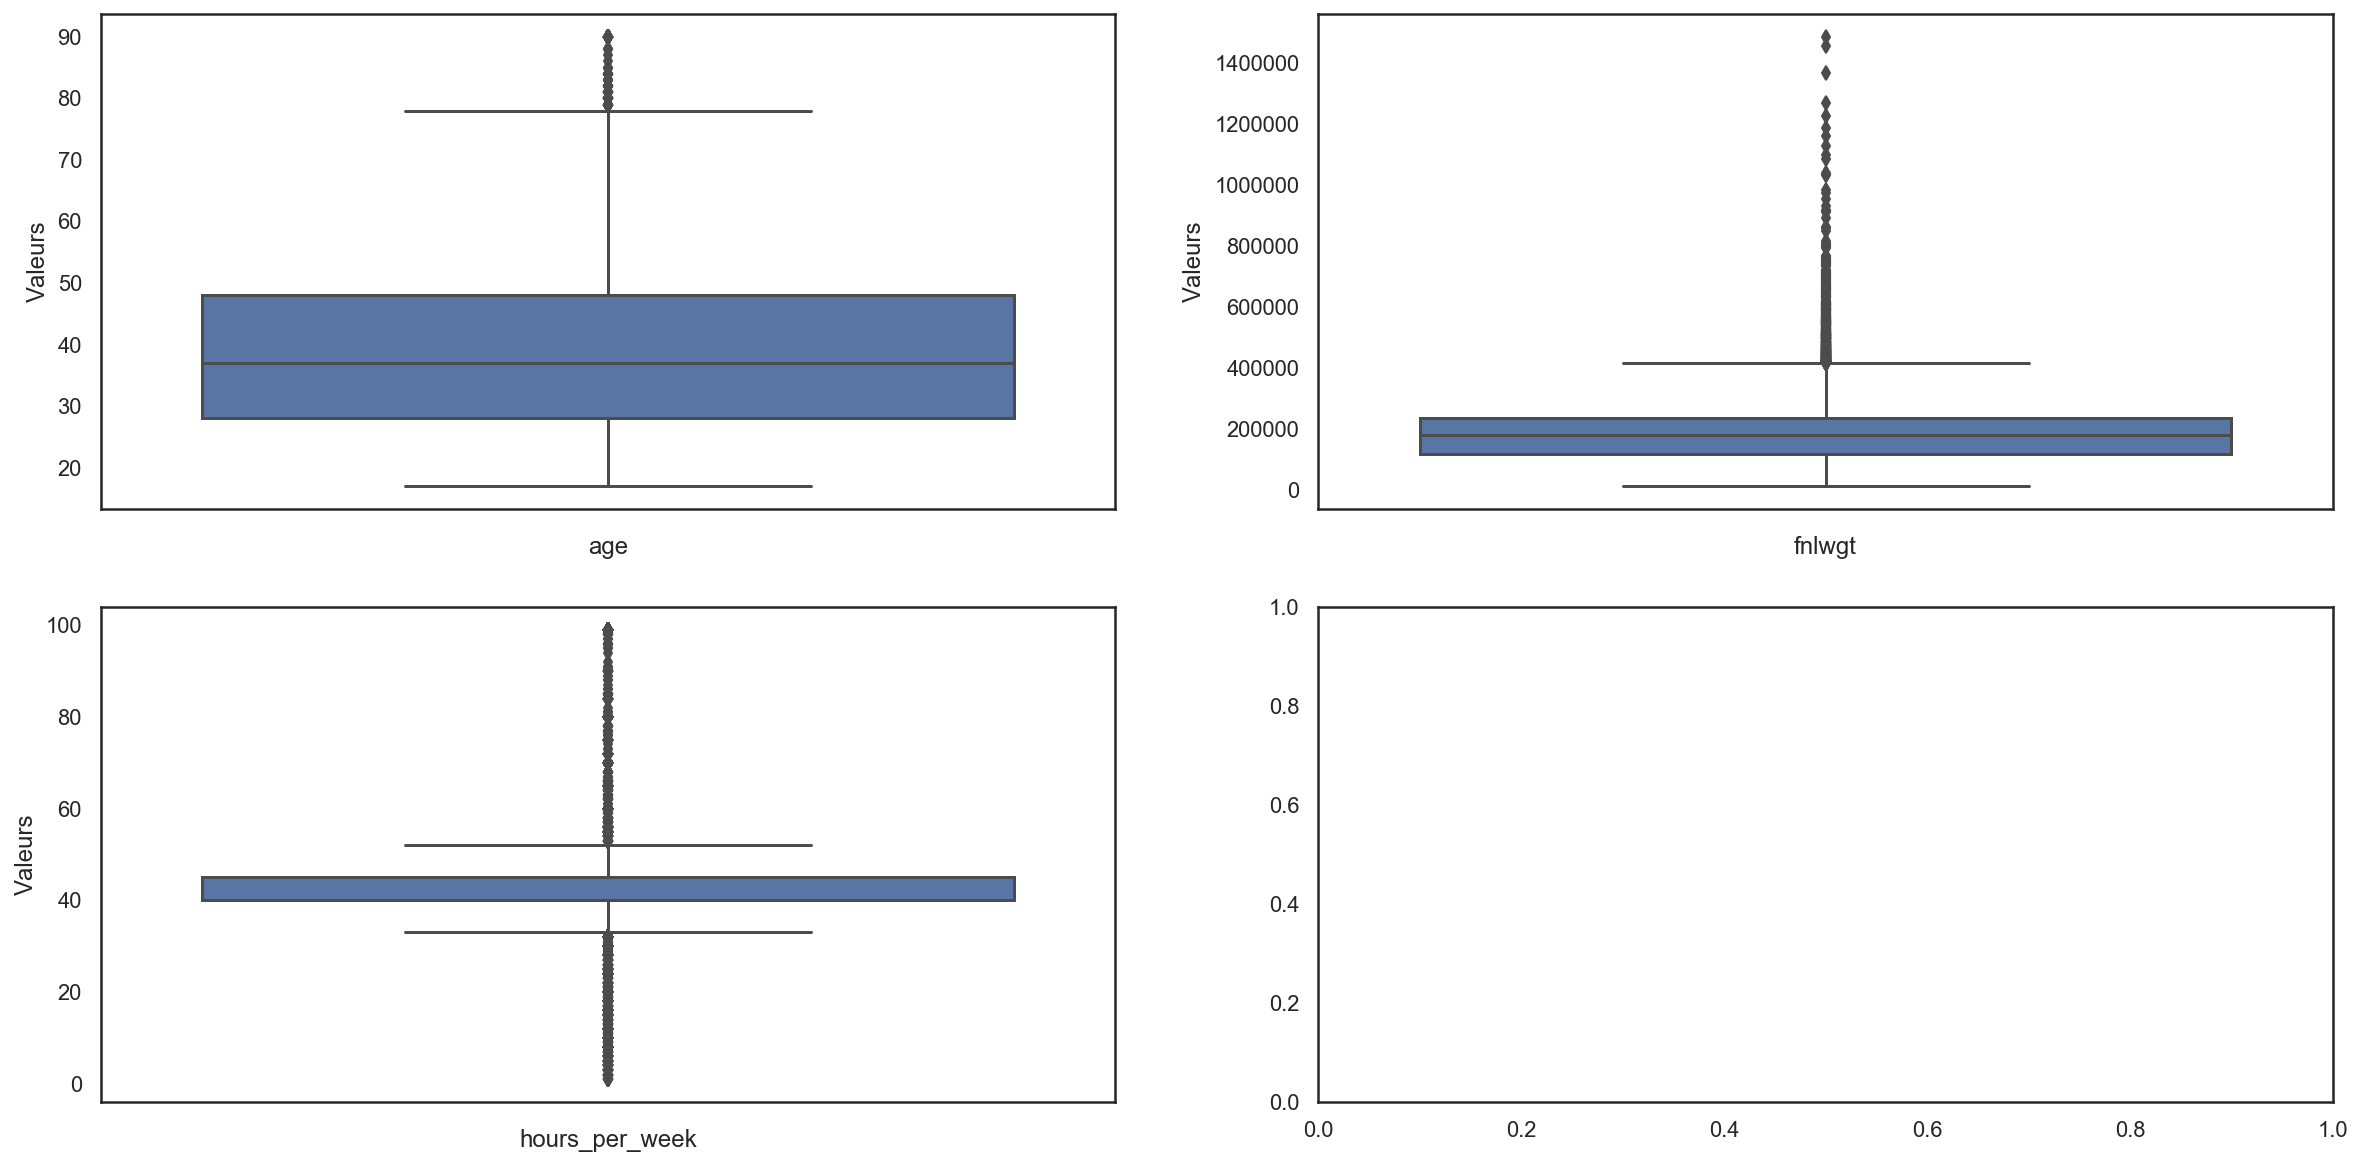

In [16]:
sns.set(style="white")
fig, axes = plt.subplots(2, 2, figsize=(20, 10))

dict1 = {0:(age, axes[0, 0],"age"),
         1:(fnlwgt,axes[0, 1],"fnlwgt"),
         2:(hours_per_week,axes[1, 0],"hours_per_week")
        }

for i in range(3):
    sns.boxplot( 
        y=dict1[i][0],
        ax=dict1[i][1],
        ).set(
        xlabel=dict1[i][2], 
        ylabel='Valeurs',
        )

plt.show()

In [17]:
age_described = age.describe().T.head()
fnlwgt_described = fnlwgt.describe().T.head()
hours_per_week_described = hours_per_week.describe().T.head()

age_fnlwgt = pd.concat([age_described, fnlwgt_described])
fnlwgt_education = pd.concat([age_fnlwgt,hours_per_week_described])
description = pd.DataFrame(fnlwgt_education)

description.head()

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.585946,13.638589,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189786.693898,105554.833291,12285.0,117814.0,178356.0,236994.0,1484705.0
hours_per_week,32561.0,40.436780,12.346741,1.0,40.0,40.0,45.0,99.0


In [18]:
data.to_numpy()

# On cut de cette façon là car ca nous paraît pertinent, mais également car relation d'ordre
# donc pas besoin de faire des one hot vectors

age = pd.cut(data.age,bins=[0,14,28,37,48,70,100],labels=[0,1,2,3,4,5])
fnlwgt = pd.cut(data.fnlwgt,bins=[0, 117830, 178356, 236993, 1500000],labels=[0,1,2,3])
hours_w = pd.cut(data.hours_per_week,bins=[0,20,40,45,100],labels=[0,1,2,3])

age = pd.DataFrame(age)
fnlwgt = pd.DataFrame(fnlwgt)
hours_w = pd.DataFrame(hours_w)
data = data.drop(['age', 'fnlwgt', "hours_per_week"], axis=1, inplace=False)

In [19]:
data = data.replace(to_replace=[" Cambodia", " China", " Hong", " Laos", " Thailand",
               " Japan", " Taiwan", " Vietnam"], value="Asie_est")
data = data.replace(to_replace=[" India", " Iran"], value="Asie_centre")
data = data.replace(to_replace=[" Cuba", " Guatemala", " Jamaica", " Nicaragua", 
                     " Puerto-Rico",  " Dominican-Republic", " El-Salvador", 
                     " Haiti", " Honduras", " Mexico", " Trinadad&Tobago"], value="amerique_centre")
data = data.replace(to_replace=[" Ecuador", " Peru", " Columbia"], value="amerique_sud")
data = data.replace(to_replace=[" England", " Germany", " Holand-Netherlands", " Ireland", 
                 " France", " Greece", " Italy", " Portugal", " Scotland"], value="europe_ouest")
data = data.replace(to_replace=[" Poland", " Yugoslavia", " Hungary"], value="europe_est")

In [20]:
workclass= pd.DataFrame(data['workclass'])
workclass= pd.get_dummies(workclass,prefix=['workclass'])

marital_status= pd.DataFrame(data['marital_status'])
marital_status = pd.get_dummies(marital_status,prefix=['marital_status'])

occupation= pd.DataFrame(data['occupation'])
occupation = pd.get_dummies(occupation,prefix=['occupation'])

relationship= pd.DataFrame(data['relationship'])
relationship = pd.get_dummies(relationship,prefix=['relationship'])

race= pd.DataFrame(data['race'])
race= pd.get_dummies(race,prefix=['race'])

sex= pd.DataFrame(data['sex'])
sex = pd.get_dummies(sex,prefix=['sex'])

native_country= pd.DataFrame(data['native_country'])
native_country = pd.get_dummies(native_country,prefix=['native_country'])


workclass_status = pd.concat([workclass, marital_status], axis=1)
status_occupation = pd.concat([workclass_status, occupation], axis=1)
occupation_relationship = pd.concat([status_occupation, relationship], axis=1)
relationship_race = pd.concat([occupation_relationship, race], axis=1)
race_sex = pd.concat([relationship_race, sex], axis=1)
sex_country = pd.concat([race_sex, native_country], axis=1)
country_age = pd.concat([sex_country, age], axis=1)
age_fnlwgt = pd.concat([country_age, fnlwgt], axis=1)
fnlwgt_hours = pd.concat([age_fnlwgt, hours_w], axis=1)
data = pd.concat([fnlwgt_hours, prediction], axis=1)

In [21]:
data.head()

,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,marital_status_ Divorced,marital_status_ Married-AF-spouse,...,native_country_Asie_centre,native_country_Asie_est,native_country_amerique_centre,native_country_amerique_sud,native_country_europe_est,native_country_europe_ouest,age,fnlwgt,hours_per_week,income
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,3,0,1,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,4,0,0,0
2,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,3,2,1,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,4,2,1,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,1,3,1,0


Relation d'ordre : fnlwgt, age, hours_per_week, educaction (donc ne pas supprimer la colonne num_education, mais bien education)
One hot vector ; tout le reste

In [22]:
data_train = data[:data_train.shape[0]]
data_test = data[data_train.shape[0]:]

print(data_train.shape)
print(data_test.shape)

(32561, 57)
(16252, 57)


In [23]:
labels_train = data_train["income"]
data_train = data_train.drop(["income"], axis=1, inplace=False)
labels_train = labels_train.to_numpy()
labels_train = labels_train.reshape(32561)

In [24]:
labels_test = data_test["income"]
data_test = data_test.drop(["income"], axis=1, inplace=False)
labels_test = labels_test.to_numpy()
labels_test = labels_test.reshape(16252)

In [25]:
labels_train.shape

(32561,)

In [26]:
from sklearn import preprocessing

columns = data.columns

data_test = pd.DataFrame(preprocessing.scale(data_test))
data_test.columns = columns[:-1]

data_train = pd.DataFrame(preprocessing.scale(data_train))
data_train.columns = columns[:-1]

In [27]:
data_test.to_csv("data/csv/preprocessed/data_test.csv", index=False, header=True)
data_train.to_csv("data/csv/preprocessed/data_train.csv", index=False, header=True)

In [28]:
labels_train.shape[0]

32561

## Clusterings Kmeans

Evaluating the performance of a clustering algorithm is not as trivial as counting the number of errors or the precision and recall of a supervised classification algorithm. In particular any evaluation metric should not take the absolute values of the cluster labels into account but rather if this clustering define separations of the data similar to some ground truth set of classes or satisfying some assumption such that members belong to the same class are more similar that members of different classes according to some similarity metric.

In [29]:
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics.pairwise import euclidean_distances

def error_kmeans_supervised(data_train, labels_train, labels_test, data_test, k):
    taille_totale = np.zeros(k)
    error_test = np.zeros(k)
    classe_rpz_per_cluster = np.zeros(k)
    kmeans = KMeans(n_clusters=k, init='random', n_init=100, max_iter=150, random_state=0, verbose=0)    
    res_train = kmeans.fit(data_train)
    for i in range(len(res_train.labels_)):
        out = labels_train[i]
        classe_rpz_per_cluster[res_train.labels_[i]] += out
        taille_totale[res_train.labels_[i]] += 1
    assert np.sum(taille_totale) == data_train.shape[0]
    error_res = classe_rpz_per_cluster / taille_totale
    taille_totale = taille_totale / data_train.shape[0]
    assert np.sum(taille_totale)
    classe_in_cluster = [1 if elt > 0.5 else 0 for elt in error_res]
    error_totale = [elt if elt < 0.5 else (1 - elt) for elt in error_res]
    error_totale = error_totale * taille_totale
    res_test = res_train.predict(data_test)
    classe_per_cluster_test = [classe_in_cluster[elt] for elt in res_test]
    error_test = np.sum(classe_per_cluster_test != labels_test)
    return np.sum(error_totale), error_test/data_test.shape[0]


def choose_plot_best_k(data_train, labels_train, labels_test, data_test, k_values):
    error_test_tab = []
    error_train_tab = []
    for k in k_values:
        error_train, error_test = error_kmeans_supervised(data_train, labels_train, labels_test, data_test, k)
        error_test_tab.append(error_test)
        error_train_tab.append(error_train)
    plot_error(error_test_tab, error_train_tab, k_values)
    kmean_best_k(error_train_tab, error_test_tab, data_train, labels_train, labels_test)
    


def plot_error(error_test_tab, error_train_tab, k_values):  
    """
    """
    max_k = np.amax(k_values)
    error_train_tab = np.asarray(error_train_tab)
    error_test_tab = np.asarray(error_test_tab)
    plt.figure(figsize=(10, 10))

    plt.subplot(2, 1, 1)
    plt.plot(k_values, error_train_tab, '.--', label='Error train')
    min_error_train = np.amin(error_train_tab)
    title = 'Minimal train error: {:.2f}%'.format(min_error_train)
    plt.ylabel('error')
    plt.title(title)        
    plt.legend()
    
    plt.subplot(2, 1, 2)
    plt.plot(k_values, error_test_tab, '.--', label='Error test')
    min_error_test = np.amin(error_test_tab)
    title = 'Minimal test error: {:.2f}%'.format(min_error_test)
    plt.xlabel('value of k')
    plt.ylabel('Error')
    plt.title(title)
    plt.legend()
    
    
def kmean_best_k(error_train_tab, error_test_tab, data_train, labels_train, labels_test):
    """
    """
    indice_min_error = np.argmin(error_train_tab)
    best_k = k_values[indice_min_error]   
    error_train, error_test = error_kmeans_supervised(data_train, labels_train, labels_test, data_test, best_k)
    # accuracy_test = error_test / labels_test.shape[0]
    print("Avec le meilleur paramètre k : ",best_k, "l'erreur de test du clustering sur le jeu de test est: {:.2f}%"
          .format(error_test))
    return best_k


In [ ]:
k_values = np.arange(2,72,10)
#for k in k_values: 
#    a, b = error_kmeans(data_train, labels_train, labels_test, data_test, k)
#    print(np.sum(a), b)
best_k = choose_plot_best_k(data_train, labels_train, labels_test, data_test, k_values)


In [ ]:
print(error_kmeans_supervised(data_train, labels_train, labels_test, data_test, 2))

## Classification knn

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

k_values = np.arange(2,100,40)


def knn_acc(data_train, data_test, labels_train, labels_test, k_values):
    scores = []
    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(data_train, labels_train)
        laebs_test = knn.predict(data_test)
        scores.append(accuracy_score(labels_test, laebs_test))
    k_accuracy_plot().plot(k_values, scores)
    return scores
    
    
def k_accuracy_plot(max_k=72):
  plt.grid(True)
  plt.xlabel("k")
  plt.ylabel("Accuracy")
  plt.xlim([0, max_k + 5])
  plt.ylim([0.3, 1])
  plt.xticks(range(0, max_k + 5, 5))
  return plt

def knn_best_k(data_train, data_test, labels_train, labels_test, k_values, scores):
    indice_best_k = np.argmax(scores)
    best_k = k_values[indice_best_k]
    knn = KNeighborsClassifier(n_neighbors=best_k)
    knn.fit(data_train, labels_train)
    Y_pred = knn.predict(data_test)
    accuracy = accuracy_score(labels_test, Y_pred)
    print("Avec le meilleur paramètre k, la justesse de knn sur le jeu de test est: {:.2f}%".format(accuracy))
    return best_k

In [ ]:
stat = []
for i in range(10):
    print(i)
    score = knn_acc(data_train, data_test, labels_train, labels_test, [80])
    stat.append((score[0]))
print(stat)


knn_acc(data_train, data_test, labels_train, labels_test, k_values)

In [ ]:
knn_best_k(data_train, data_test, labels_train, labels_test, k_values, scores)

## Choix des variables ( étape 1 et 2 )

#### Etape 1

Dans un premier temps, pour chaque feature de data_train, effectuer k_means pour une seule de ces features, et garder uniquement la feature pour laquelle l'erreur d'apprentissage est le plus faible. Ensuite garder cette feature et faire la même chose avec une deuxieme feature, et garder le meilleur couple, pareil pour une troisième feature etc. Le critère d'arrêt est lorsque l'erreur la plus basse pour une certaine combinaison de variable est supèrieure à l'erreur trouvée sur la combinaison précédente. 

In [48]:
def error(columns_train, columns_test):
    error_train, error_test = error_kmeans_supervised(columns_train, 
                                                 labels_train, labels_test, 
                                                 columns_test, 2)
    return(error_train, error_test)

def glouton_algorithm(data_train, data_test, labels_train, labels_test, best_k):
    errors_selected_features = [100, 99.9999]
    # Tableau de strings correspondant aux noms des colonnes select:
    selected_features = []
    final_dataframe_train = pd.DataFrame()
    final_dataframe_test = pd.DataFrame()
    while errors_selected_features[-1] < errors_selected_features[-2]:
        current_error = []
        print("nombre de features select", len(errors_selected_features)-2)
        # Création du dataframe sans les caractéristiques :
        if len(errors_selected_features) > 2:
            print("On drop la derniere feature ie : ", selected_features[-1])
            data_train = data_train.drop([selected_features[-1]], axis=1, inplace=False)
            data_test = data_test.drop([selected_features[-1]], axis=1, inplace=False)
        # Parcourir toutes les colonnes du jeu de données sans features sélectionnées
        for columns in data_train.columns: 
            # Concaténation du dataframe de features sélectionnées avec la colonne courrante
            # Pour le jeu de train:
            if len(errors_selected_features) > 2:
                data_train_temp = pd.concat([data_train[columns], final_dataframe_train], axis=1)
                # Pour le jeu de test:
                data_test_temp = pd.concat([data_test[columns], final_dataframe_test], axis=1)
            else: 
                data_train_temp = data_train[columns].values.reshape(-1,1)
                data_test_temp = data_test[columns].values.reshape(-1,1)
            # On calcule l'erreur pour le groupe de features selectionnées:
            error_train_temp = error(data_train_temp, data_test_temp)[0]
            # On ajoute cette erreur à un tableau de suivi des erreurs pour l'étape courrante:
            current_error.append(error_train_temp)
        # On calcule l'erreur la plus basse et on récupère le nom de la feature selectionné
        best_feature_index = np.argmin(current_error)
        best_feature = data_train.columns[best_feature_index]
        selected_features.append(best_feature)
        print("La best feature selected est : ", best_feature)
        if len(errors_selected_features) > 2:
            final_dataframe_train = pd.concat([data_train[best_feature], final_dataframe_train], axis=1)
            # Pour le jeu de test:
            final_dataframe_test = pd.concat([data_test[best_feature], final_dataframe_test], axis=1)
        else:
            final_dataframe_train = data_train[best_feature]
            final_dataframe_test = data_test[best_feature]
        # On update la valeur d'erreur courante
        errors_selected_features.append(np.amin(current_error))
        print("erreur actuelle : ", errors_selected_features)
    # On retourne le tableau contenant les noms des features permettant un clustering optimal (supervisé)
    print(selected_features)
    print(errors_selected_features)

In [49]:
glouton_algorithm(data_train, data_test, labels_train, labels_test, 2)

nombre de features select 0
La best feature selected est :  workclass_ Self-emp-inc
erreur actuelle :  [100, 99.9999, 0.23706274377322564]
nombre de features select 1
On drop la derniere feature ie :  workclass_ Self-emp-inc
La best feature selected est :  workclass_ Never-worked
erreur actuelle :  [100, 99.9999, 0.23706274377322564, 0.23706274377322564]
['workclass_ Self-emp-inc', 'workclass_ Never-worked']
[100, 99.9999, 0.23706274377322564, 0.23706274377322564]


#### Etape 2

In [ ]:
def error_kmeans_not_supervised(data_train, labels_train, labels_test, data_test, k):
    taille_totale = np.zeros(k)
    error_test = np.zeros(k)
    classe_rpz_per_cluster = np.zeros(k)
    kmeans = KMeans(n_clusters=k, init='random', n_init=100, max_iter=150, random_state=0, verbose=0)    
    res_train = kmeans.fit(data_train)
    for i in range(len(res_train.labels_)):
        out = labels_train[i]
        classe_rpz_per_cluster[res_train.labels_[i]] += out
        taille_totale[res_train.labels_[i]] += 1
    assert np.sum(taille_totale) == data_train.shape[0]
    error_res = classe_rpz_per_cluster / taille_totale
    taille_totale = taille_totale / data_train.shape[0]
    assert np.sum(taille_totale)
    classe_in_cluster = [1 if elt > 0.5 else 0 for elt in error_res]
    error_totale = [elt if elt < 0.5 else (1 - elt) for elt in error_res]
    error_totale = error_totale * taille_totale
    res_test = res_train.predict(data_test)
    classe_per_cluster_test = [classe_in_cluster[elt] for elt in res_test]
    error_test = np.sum(classe_per_cluster_test != labels_test)
    return np.sum(error_totale), error_test/data_test.shape[0]
